## 時系列データ分析の実習

### データを読み込む

In [1]:
# PandasでCSVファイルを読み込む
import pandas as pd
btc_csv = pd.read_csv('bitcoin_close_data_2017-01-01_2022-12-31.csv')

In [2]:
# btc_csvの先頭5行を表示
btc_csv.head()

,date,price
0,2017-01-01,995.4
1,2017-01-02,1017.0
2,2017-01-03,1033.3
3,2017-01-04,1135.4
4,2017-01-05,989.3


In [3]:
# btc_csvの末尾5行を表示
btc_csv.tail()

,date,price
2186,2022-12-27,16706.1
2187,2022-12-28,16546.2
2188,2022-12-29,16636.4
2189,2022-12-30,16607.2
2190,2022-12-31,16537.4


In [4]:
# price列のみでSeries型のデータを作る
btc_price = btc_csv["price"]

# date列の内容をPeriodIndex型に変換してbtc_priceのインデックスに設定する
btc_price.index = pd.PeriodIndex(btc_csv["date"], freq="D")

# btc_priceの先頭5行を表示
btc_price.head()

date
2017-01-01     995.4
2017-01-02    1017.0
2017-01-03    1033.3
2017-01-04    1135.4
2017-01-05     989.3
Freq: D, Name: price, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

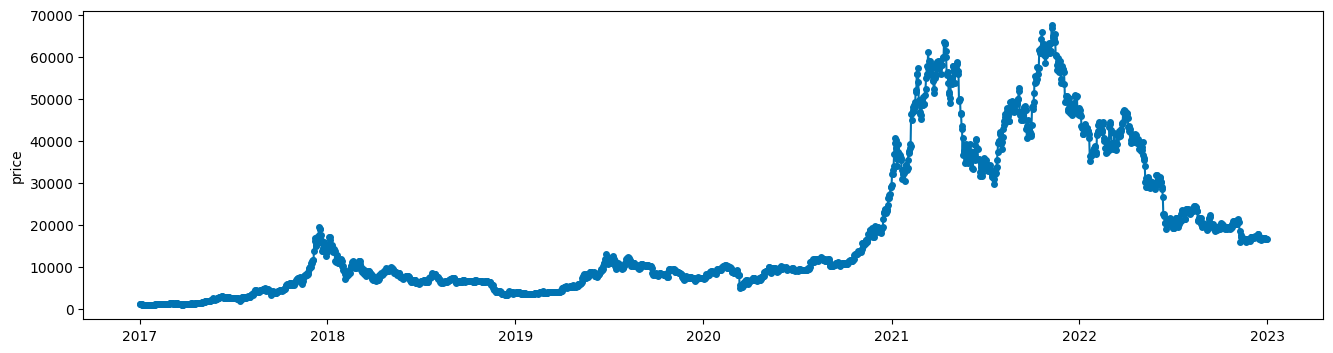

In [5]:
# btc_priceの散布図を描く
from sktime.utils.plotting import plot_series

plot_series(btc_price)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

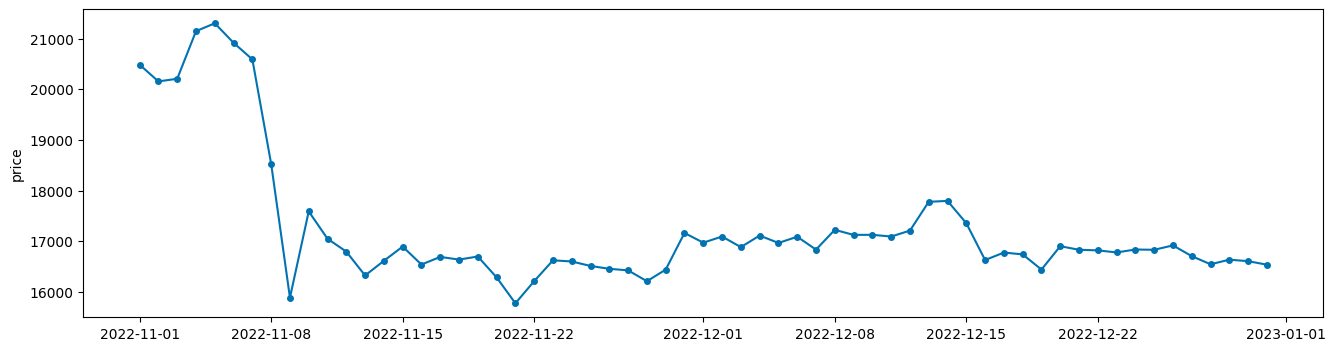

In [6]:
# 2022年11月から2022年12月末までに絞って散布図を描く
plot_series(btc_price.tail(61))

### データを訓練データとテストデータに分ける

In [7]:
# 訓練データとテストデータを分ける（テストデータは2022年12月のみ）
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(btc_price, test_size = 31)

In [8]:
# y_trainの先頭5行を表示
y_train.head()

2017-01-01     995.4
2017-01-02    1017.0
2017-01-03    1033.3
2017-01-04    1135.4
2017-01-05     989.3
Freq: D, Name: price, dtype: float64

In [9]:
# y_trainの末尾5行を表示
y_train.tail()

2022-11-26    16456.5
2022-11-27    16425.6
2022-11-28    16211.7
2022-11-29    16440.4
2022-11-30    17163.9
Freq: D, Name: price, dtype: float64

In [10]:
# y_testの先頭5行を表示
y_test.head()

2022-12-01    16972.0
2022-12-02    17093.6
2022-12-03    16884.5
2022-12-04    17112.6
2022-12-05    16966.5
Freq: D, Name: price, dtype: float64

In [11]:
# y_testの末尾5行を表示
y_test.tail()

2022-12-27    16706.1
2022-12-28    16546.2
2022-12-29    16636.4
2022-12-30    16607.2
2022-12-31    16537.4
Freq: D, Name: price, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

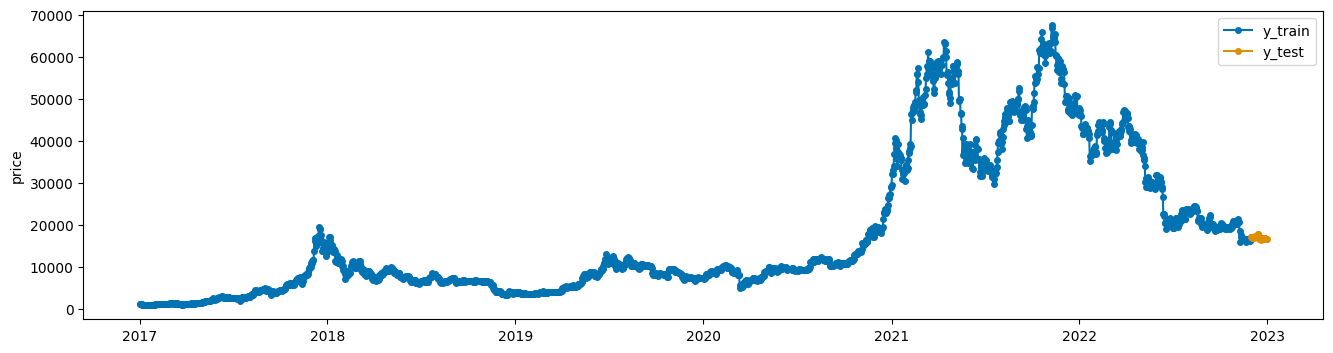

In [12]:
# y_train と y_test で散布図を描く
plot_series(y_train, y_test, labels=["y_train", "y_test"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

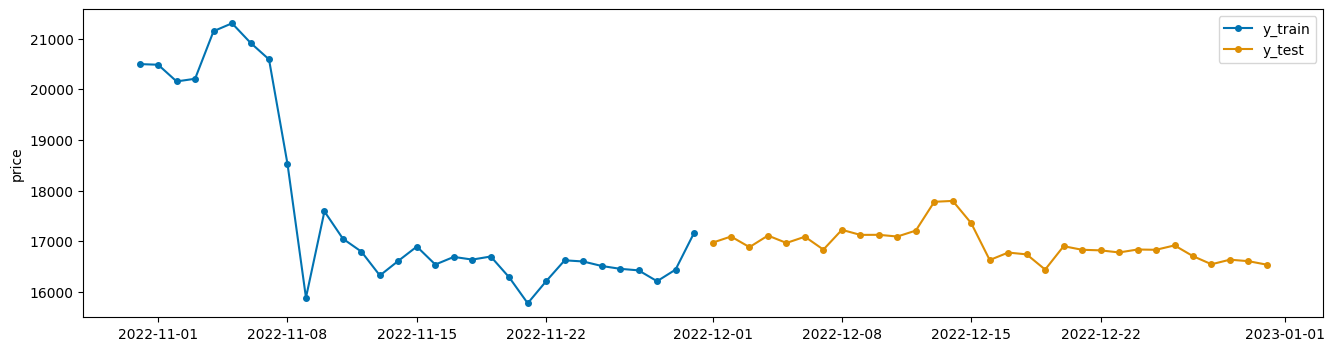

In [13]:
# 2022年11月から2022年12月末までに絞って散布図を描く
plot_series(y_train.tail(31), y_test, labels=["y_train", "y_test"])

### モデルを作成して訓練する

In [14]:
# ARIMAモデルを自動作成する
from sktime.forecasting.arima import AutoARIMA

model = AutoARIMA(suppress_warnings=True)

In [ ]:
# モデルを学習させる
model.fit(y_train)

### 期待する性能が出たかを評価する

In [16]:
# y_test のインデックスを取得する
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
             '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
             '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12',
             '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16',
             '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
             '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
             '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30', '2022-12-31'],
            dtype='period[D]', is_relative=False)

In [ ]:
# 予測を行なう
y_pred = model.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

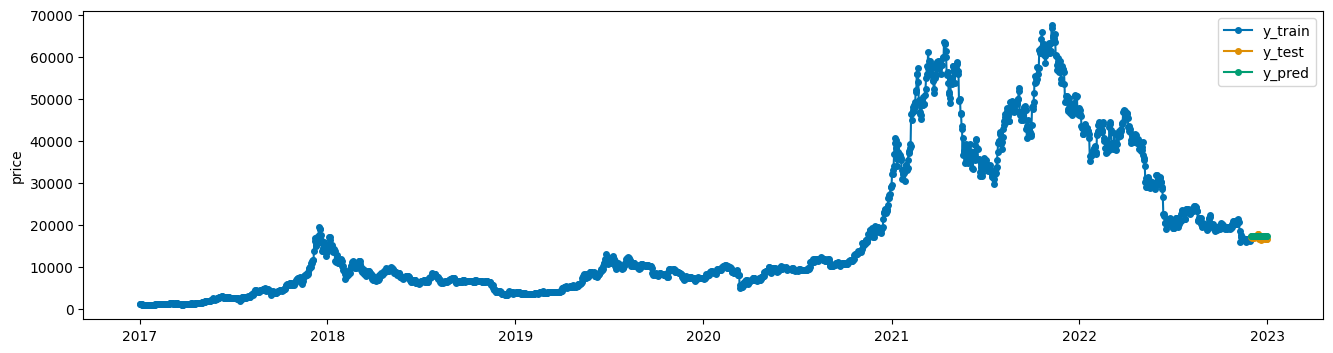

In [18]:
# y_train と y_test, y_pred で散布図を描く
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='price'>)

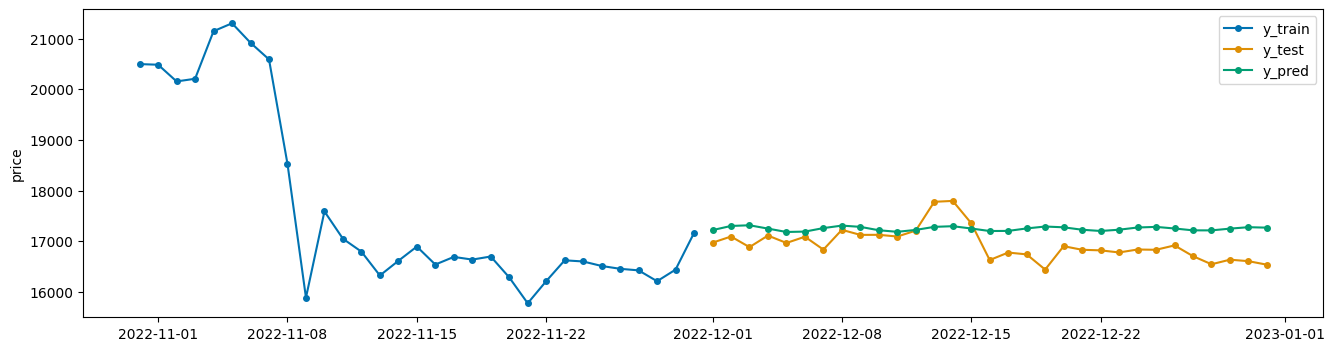

In [19]:
# 2021年12月から2022年1月末までに絞って散布図を描く
plot_series(y_train.tail(31), y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [20]:
# y_predの値を表示する
y_pred

2022-12-01    17220.103486
2022-12-02    17301.931947
2022-12-03    17315.713172
2022-12-04    17249.835394
2022-12-05    17183.108296
2022-12-06    17190.763390
2022-12-07    17259.895206
2022-12-08    17309.073978
2022-12-09    17284.037289
2022-12-10    17217.265175
2022-12-11    17186.392665
2022-12-12    17224.138530
2022-12-13    17284.025160
2022-12-14    17297.303103
2022-12-15    17251.693964
2022-12-16    17201.975058
2022-12-17    17204.402080
2022-12-18    17253.239713
2022-12-19    17290.791000
2022-12-20    17275.395696
2022-12-21    17227.446792
2022-12-22    17202.842494
2022-12-23    17227.961543
2022-12-24    17271.640511
2022-12-25    17283.597475
2022-12-26    17252.185753
2022-12-27    17215.293165
2022-12-28    17214.802658
2022-12-29    17249.172132
2022-12-30    17277.670850
2022-12-31    17268.526622
Freq: D, Name: price, dtype: float64

In [21]:
# MAPEでモデルを評価する
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.02237521811562732